In [70]:
%reload_ext autoreload
%autoreload 2

from alphadia.extraction.candidateselection import GaussianFilter
from alphadia.extraction import data, hybridselection
from alphadia.extraction.numba import numeric

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_files = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d'

dia_data = data.TimsTOFTranspose(raw_files)

0:00:00.065917  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d
0:00:00.066892  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d
0:00:00.067144  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d
0:00:00.165291  INFO: Reading 11,812 frames with 1,449,841,416 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d
100%|██████████| 11812/11812 [00:05<00:00, 2248.29it/s]
0:00:05.470157  INFO: Indexing /Users/georgwallmann/

In [3]:
precursors_flat = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_20_parameter_optimization/precursors_flat.csv')
fragments_flat = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_20_parameter_optimization/fragments_flat.csv')
psm_df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_20_parameter_optimization/alpha_psm_5_candidates.tsv', sep='\t')

In [69]:
precursors_flat[precursors_flat['precursor_idx'] == 130296]

,Unnamed: 0,elution_group_idx,precursor_idx,decoy,flat_frag_start_idx,flat_frag_stop_idx,charge,rt_library,mobility_library,mz_library,...,i_1,i_2,i_3,i_4,i_5,nAA,raw_name,mz_calibrated,rt_calibrated,mobility_calibrated
248029,248029,65931,130296,0,1321591,1321604,2,682.22817,1.056,774.889966,...,0.333053,0.171301,0.065615,0.020258,0.005266,14,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...,774.890529,656.661457,1.064752


rt_tolerance: 90.0 
mz_tolerance: 15.0 
mobility_tolerance: 0.025 
isotope_tolerance: 0.01 
peak_len_rt: 10.0 
sigma_scale_rt: 0.1 
peak_len_mobility: 0.01 
sigma_scale_mobility: 1.0 
candidate_count: 5 
top_k_precursors: 3 
top_k_fragments: 12 
max_cardinality: 10 
kernel_size: 30 
f_mobility: 1.0 
f_rt: 0.99 
center_fraction: 0.2 
min_size_mobility: 12 
min_size_rt: 3 
max_size_mobility: 40 
max_size_rt: 30 
group_channels: False 
use_weighted_score: True 
feature_std: [ 1.2583724   0.91052234  1.2126098  14.557817    0.04327635  0.24623954
  0.03225865  1.2671406 ] 
feature_mean: [ 2.967344    1.2160938   1.426444   13.960179    0.06620345  0.44364494
  0.03138363  3.1453438 ] 
feature_weight: [ 0.43898424  0.97879761  0.72262148 -0.22705527 -0.21353988  0.3174245
  0.30102549  0.44892641] 



2:21:29.111328  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
2:21:29.111784  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
2:21:29.112063  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.36
2:21:29.112384  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73
2:21:29.118352  INFO: starting candidate selection
  0%|          | 0/2 [00:00<?, ?it/s]

[[5305 7177    1]] [[326 390   1]] [774.8905  775.39215 775.89386] 15 [[774.89050293 775.89385986]]
[[5305 7177    1]] [[326 390   1]] [ 248.16068  361.24463  476.2713   533.2926   590.31384  718.37195
  878.40186  977.4698  1124.5375  1239.5636  1336.6157  1449.699  ] 15 [[774.89050293 775.89385986]]
plotting candidates: 130296


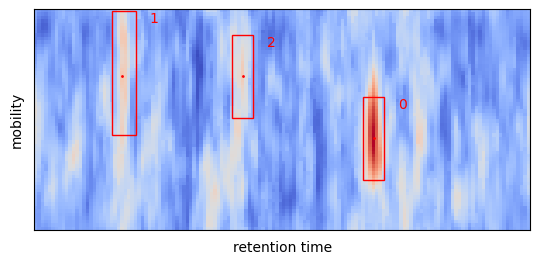

 50%|█████     | 1/2 [00:17<00:17, 17.51s/it]

[[5708 7580    1]] [[719 783   1]] [456.23404 456.73572 457.2374 ] 15 [[456.23403931 457.23739624]]
[[5708 7580    1]] [[719 783   1]] [215.10283 275.17157 362.17114 422.23978 550.29803 697.36584] 15 [[456.23403931 457.23739624]]
plotting candidates: 1


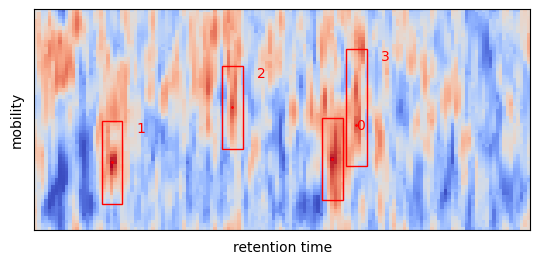

  0%|          | 0/7 [00:00<?, ?it/s]

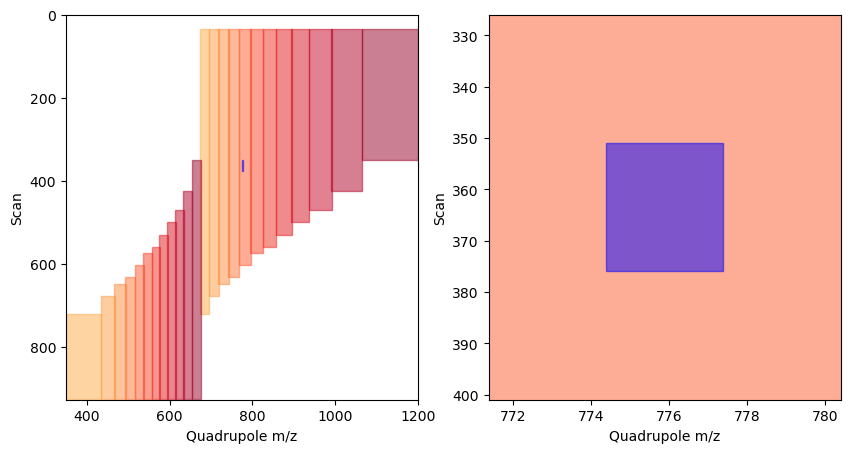

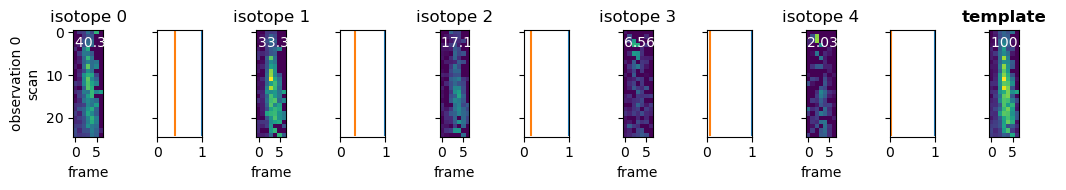

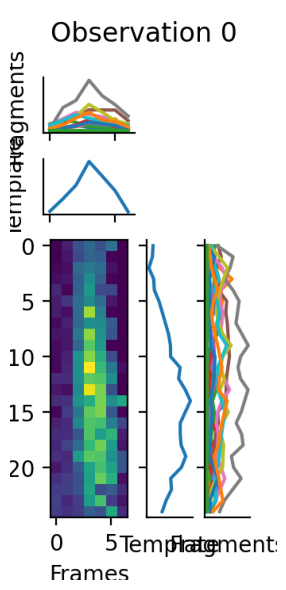

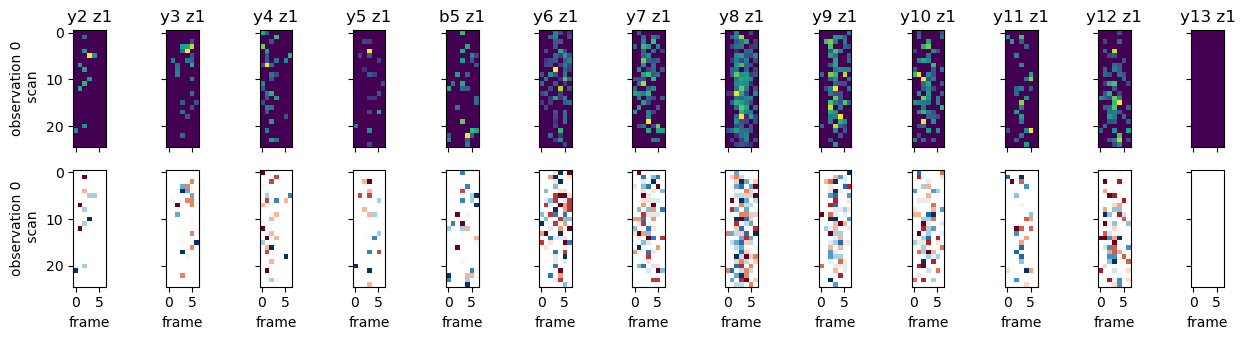

 14%|█▍        | 1/7 [00:01<00:08,  1.46s/it]

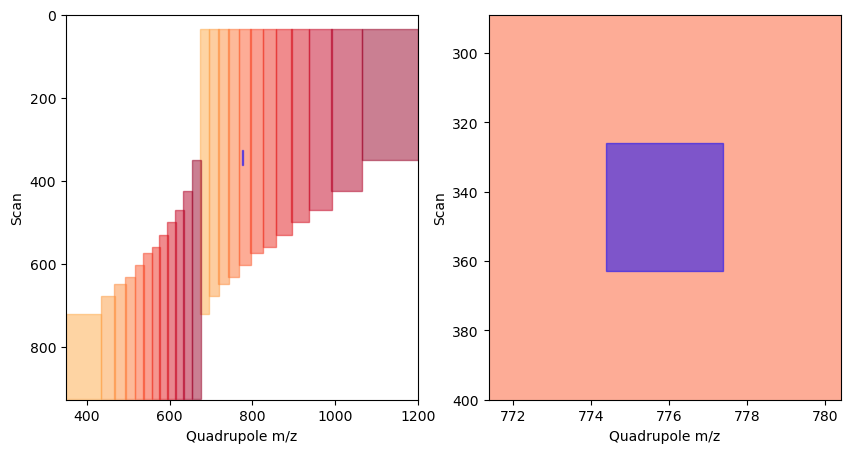

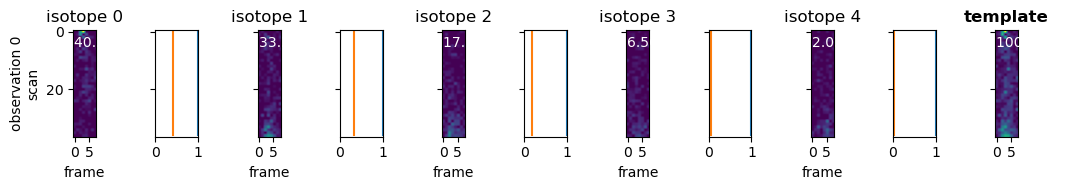

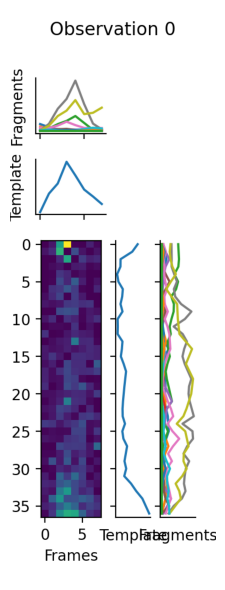

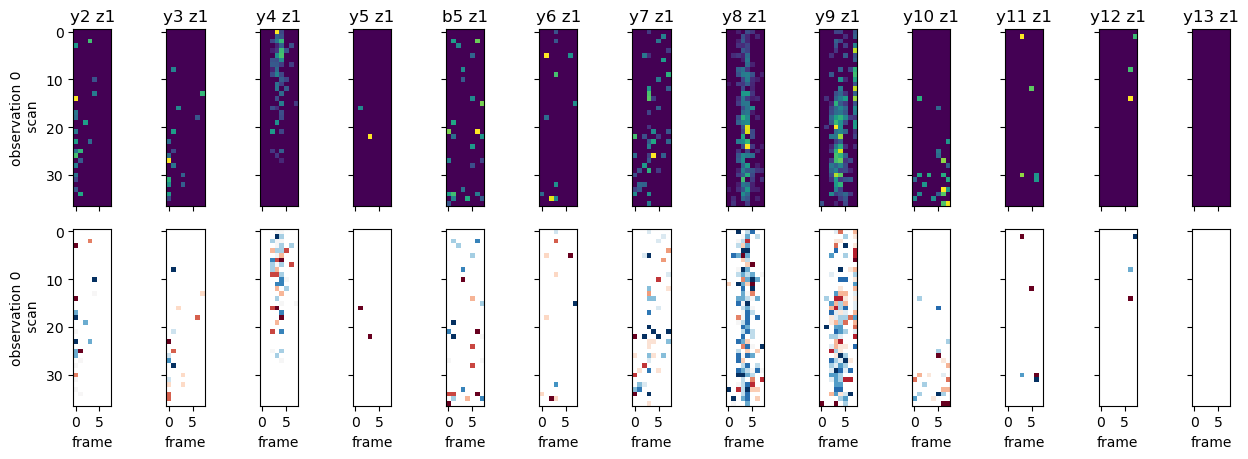

 29%|██▊       | 2/7 [00:02<00:06,  1.36s/it]

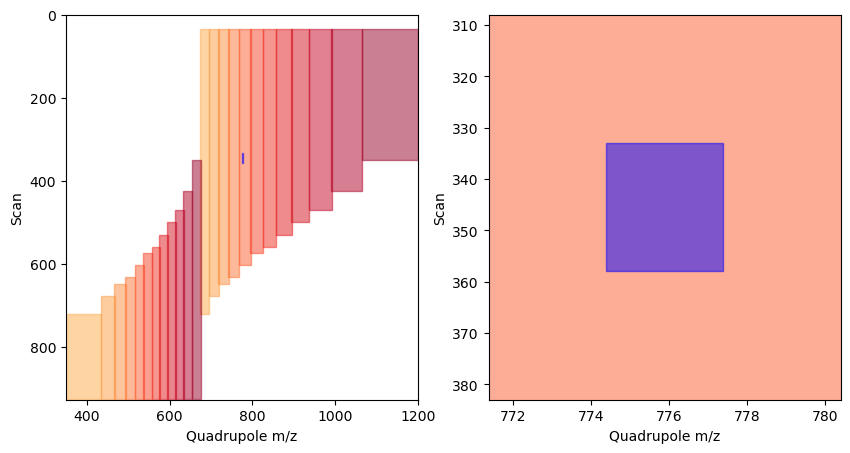

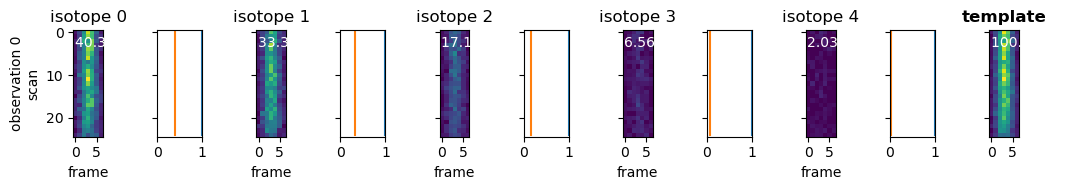

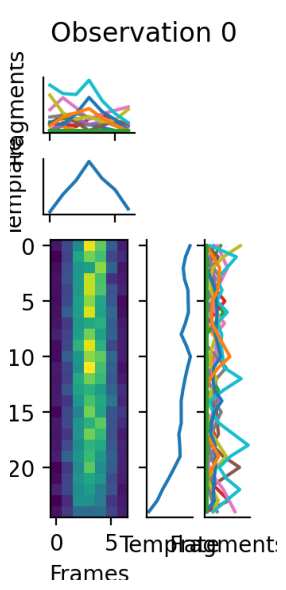

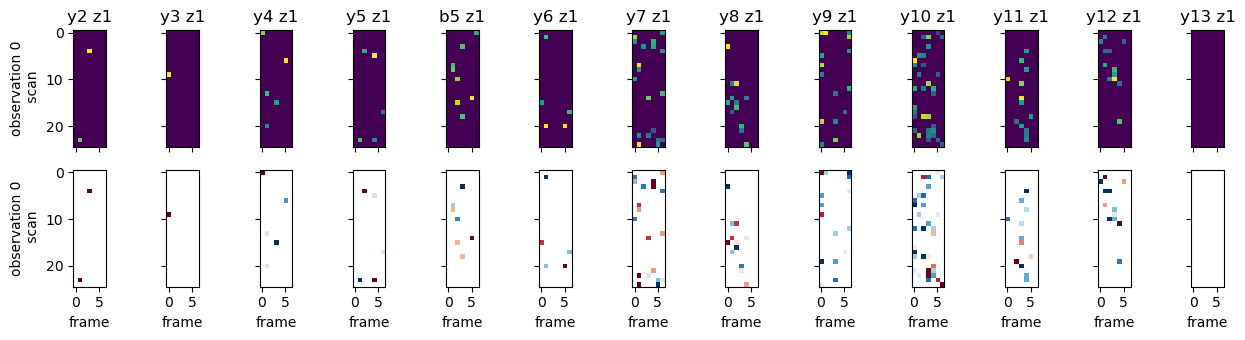

 43%|████▎     | 3/7 [00:04<00:05,  1.43s/it]

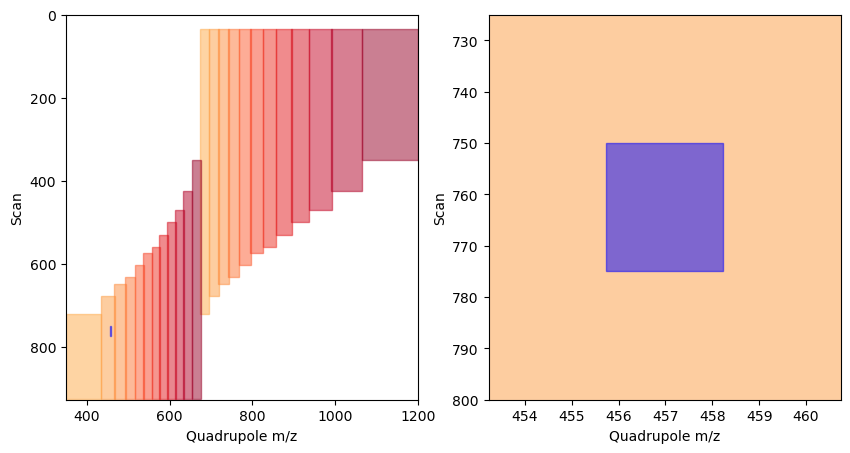

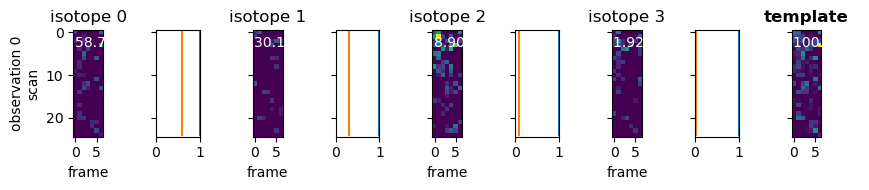

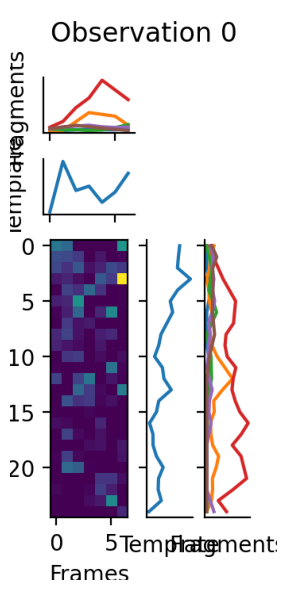

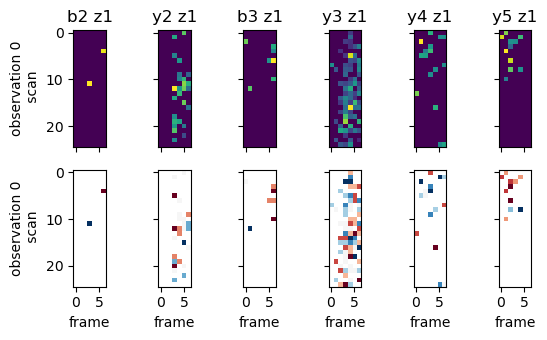

 57%|█████▋    | 4/7 [00:05<00:03,  1.20s/it]

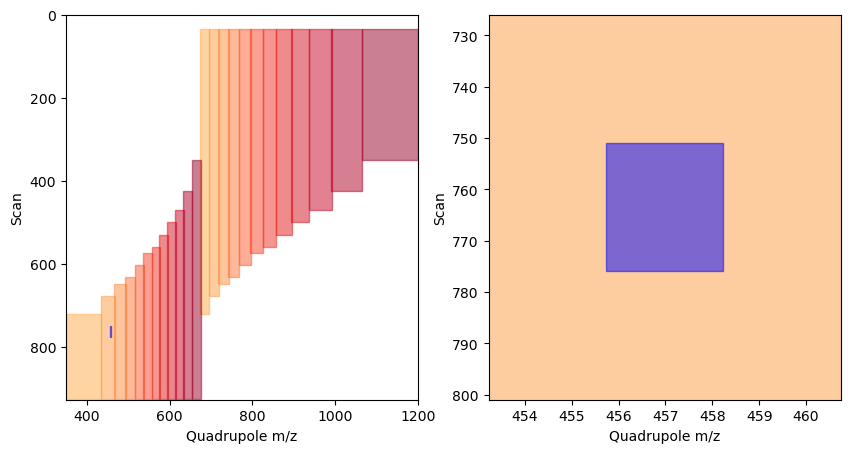

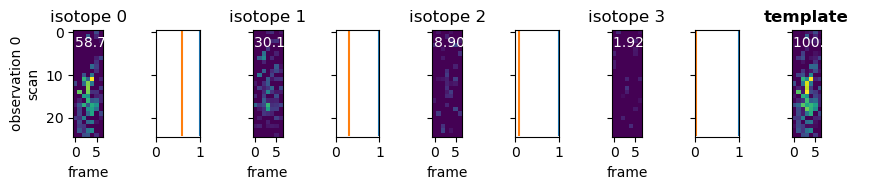

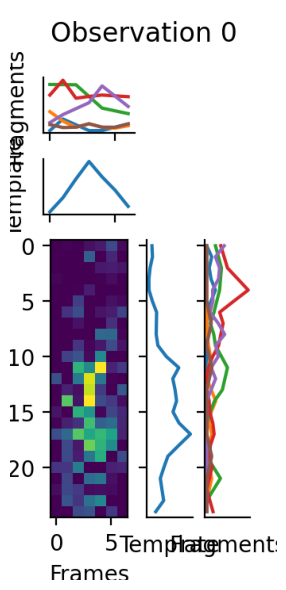

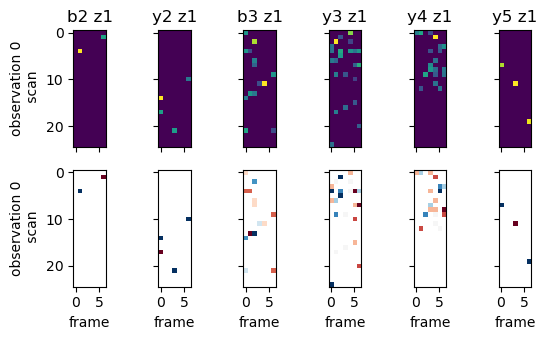

 71%|███████▏  | 5/7 [00:05<00:02,  1.06s/it]

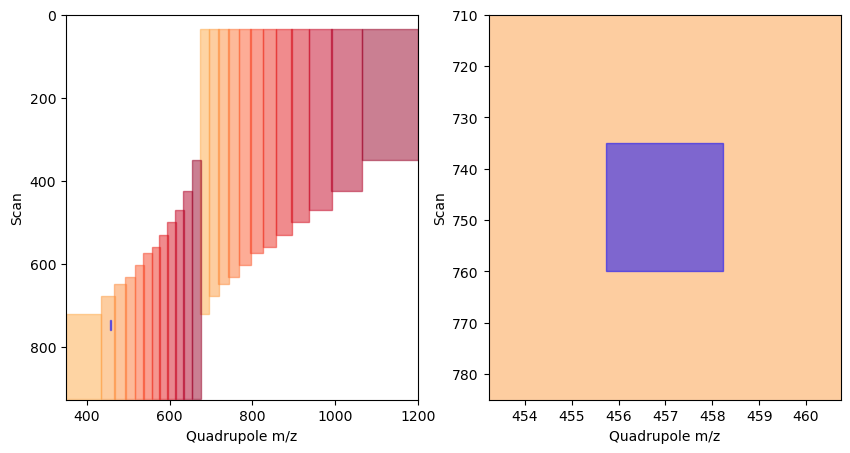

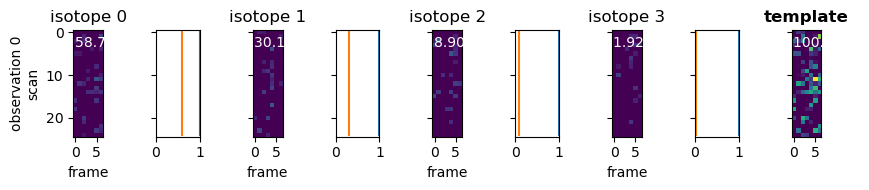

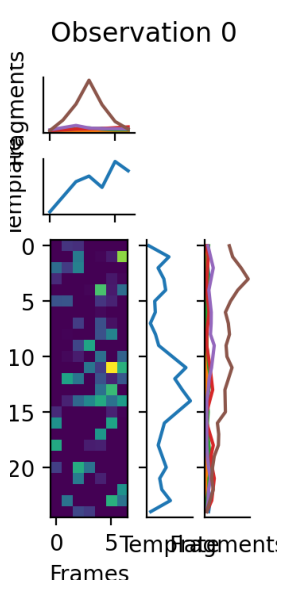

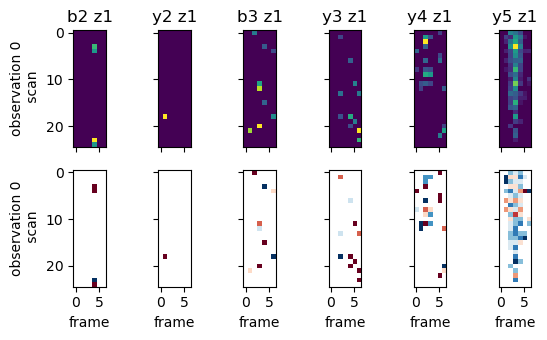

 86%|████████▌ | 6/7 [00:07<00:01,  1.08s/it]

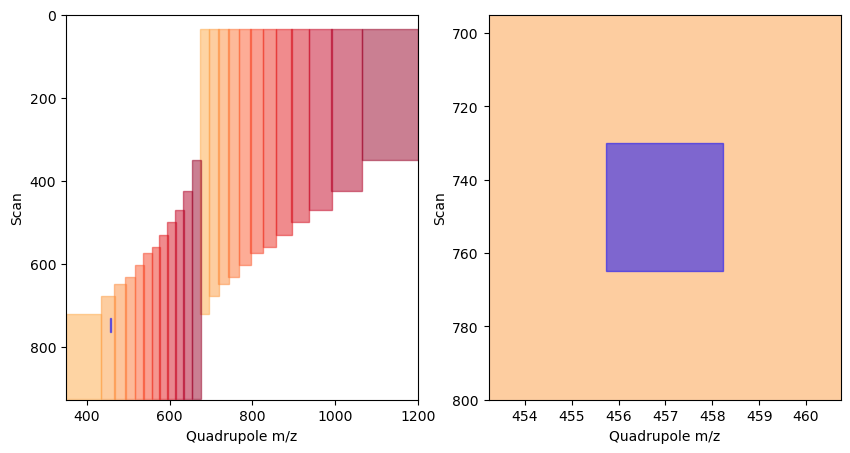

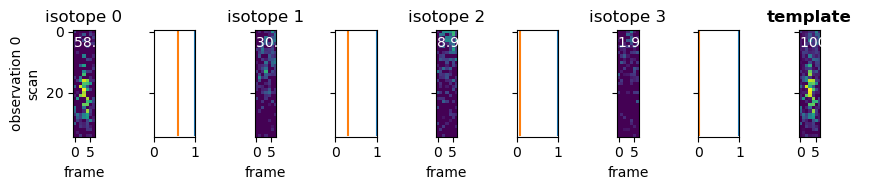

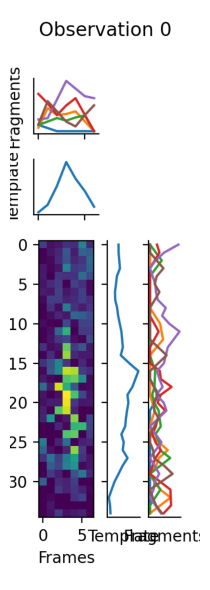

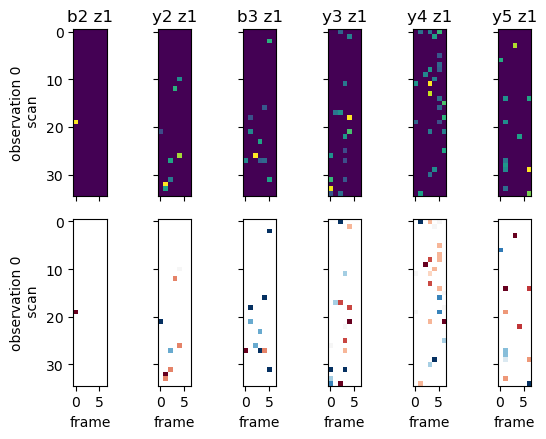

100%|██████████| 7/7 [00:07<00:00,  1.12s/it]


ValueError: too many values to unpack (expected 2)

In [43]:
from alphadia.extraction import hybridselection
from alphadia.extraction import scoring
from alphadia.extraction import quadrupole

precursors_sample = precursors_flat[precursors_flat['precursor_idx'].isin([130296,1,2])]

config = hybridselection.HybridCandidateConfig()
config.update({
    'rt_tolerance':90.,
    'mobility_tolerance': 0.025,
    'candidate_count': 5,
    'mz_tolerance': 15,
    'sigma_scale_rt': 0.1,
    'peak_len_mobility': 0.01,
    'sigma_scale_mobility': 1,
    'min_size_rt': 3,
    'min_size_mobility': 12,
    'f_mobility': 1.0,
    'center_fraction': 0.2
})

print(config)

extraction = hybridselection.HybridCandidateSelection(
    dia_data.jitclass(),
    precursors_sample,
    fragments_flat,
    config.jitclass(),
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True,
    mz_tolerance = 15,
    thread_count=10
)
candidates_df = extraction()

quad = quadrupole.SimpleQuadrupole(dia_data.cycle)

extraction = scoring.MS2ExtractionWorkflow(
    dia_data.jitclass(),
    precursors_sample,
    fragments_flat,
    candidates_df,
    debug=True,
    quadrupole_calibration = quad,
    rt_column = 'rt_calibrated',
    mobility_column = 'mobility_calibrated',
    precursor_mz_column = 'mz_calibrated',
    fragment_mz_column = 'mz_calibrated',
    precursor_mz_tolerance = 15,
    fragment_mz_tolerance = 15,
    thread_count=10
)
features_df, fragments_df = extraction()


In [44]:
pidx = 130296

frame_limits = np.array([[5305, 7177,    1]], dtype=np.int64)
scan_limits = np.array([[326, 390,   1]], dtype=np.int64)
precursor_mz_limits = np.array([774.8905,  775.39215, 775.89386], dtype=np.float32)
fragment_mz_limits = np.array([248.16068,  361.24463,  476.2713,   533.2926,   590.31384,  718.37195, 878.40186,  977.4698,  1124.5375,  1239.5636,  1336.6157,  1449.699], dtype=np.float32)
quadrupole_mz = np.array([[774.89050293, 775.89385986]], dtype=np.float32)

In [45]:
extend = list(dia_data.mobility_values[[530, 590]])+list(dia_data.rt_values[[8160, 9930]])

In [51]:
jit_data = dia_data.jitclass()
_dense_precursors, _ = jit_data.get_dense(
    frame_limits,
    scan_limits,
    precursor_mz_limits,
    10.,
    np.array([[-1.,-1.]], dtype=np.float32),
    False
)
dense_precursors = _dense_precursors.sum(axis=2)

_dense_fragments, _ = jit_data.get_dense(
    frame_limits,
    scan_limits,
    fragment_mz_limits,
    15.,
    quadrupole_mz,
    False
)

dense_fragment = _dense_fragments.sum(axis=2)


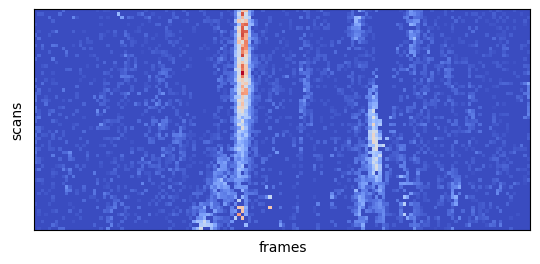

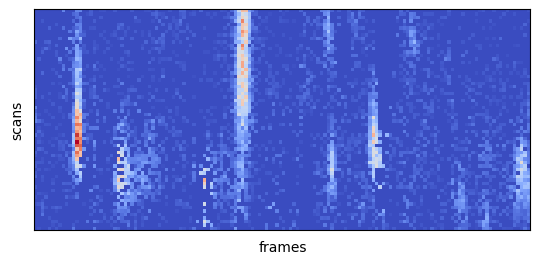

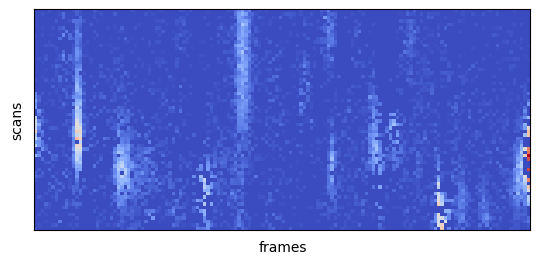

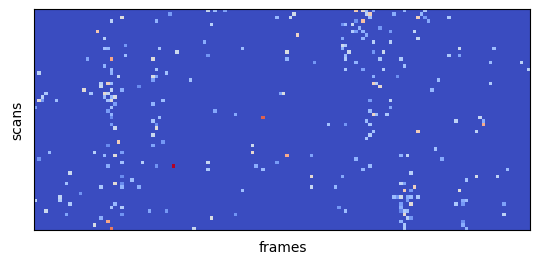

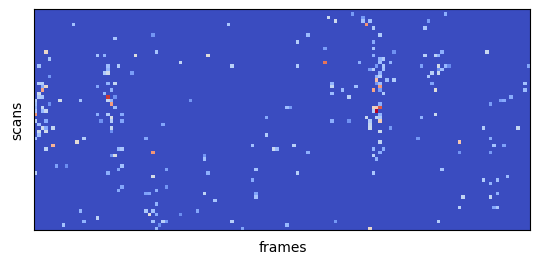

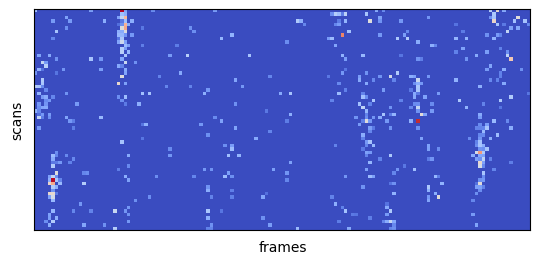

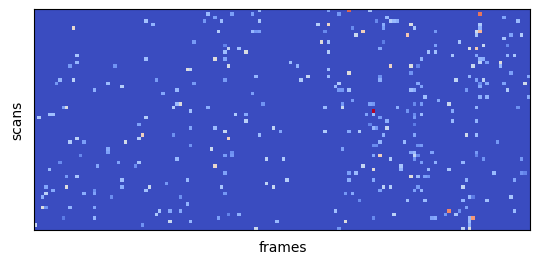

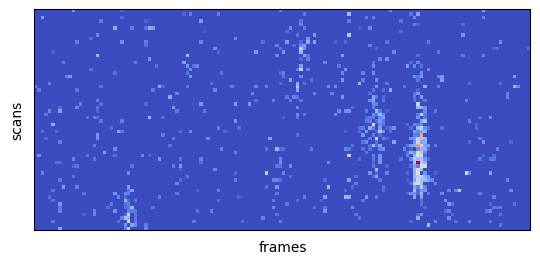

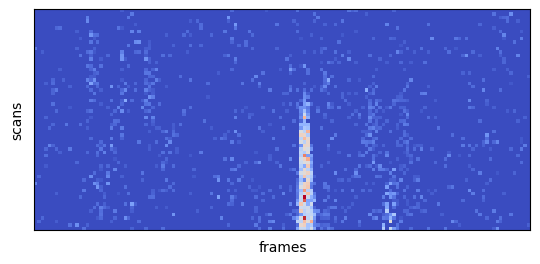

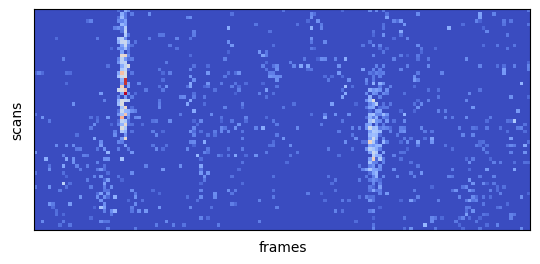

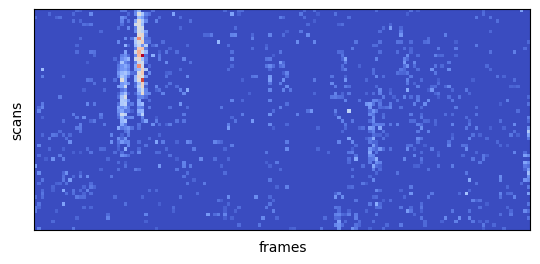

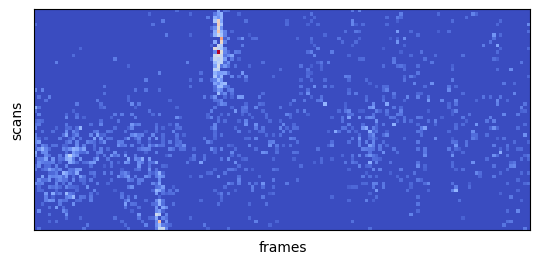

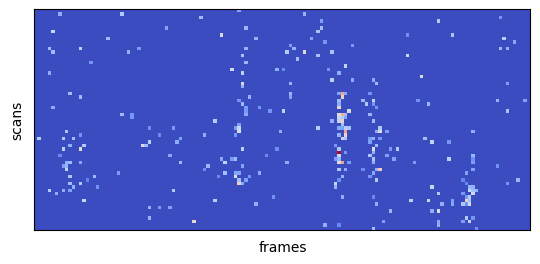

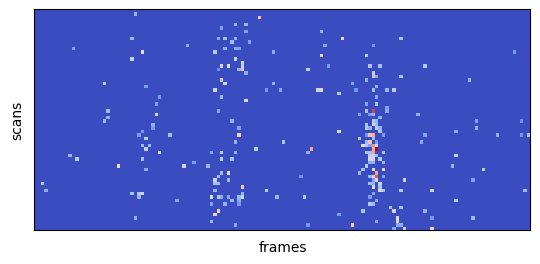

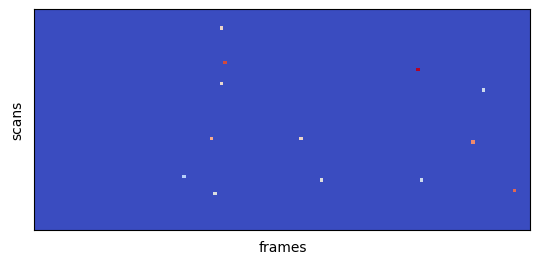

In [63]:
import os
animation_path = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_21_kernel_movie/stills'

precursor_profile = dense_precursors[0].sum(axis=(1))
for i in range(dense_precursors.shape[1]):
    plt.imshow(dense_precursors[0,i], cmap='coolwarm', interpolation='none')
    plt.ylabel('scans')
    plt.xlabel('frames')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(os.path.join(animation_path, f'{i:04d}_precursor_dense.png'), dpi=280, bbox_inches='tight')
    plt.show()

for i in range(dense_fragment.shape[1]):
    plt.imshow(dense_fragment[0,i], cmap='coolwarm', interpolation='none')
    plt.ylabel('scans')
    plt.xlabel('frames')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(os.path.join(animation_path, f'{i:04d}_fragment_dense.png'), dpi=280, bbox_inches='tight')
    plt.show()

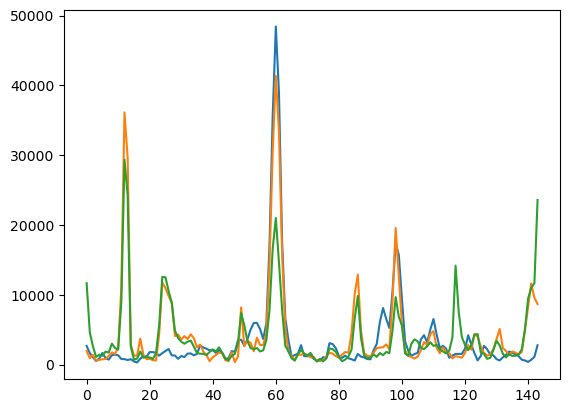

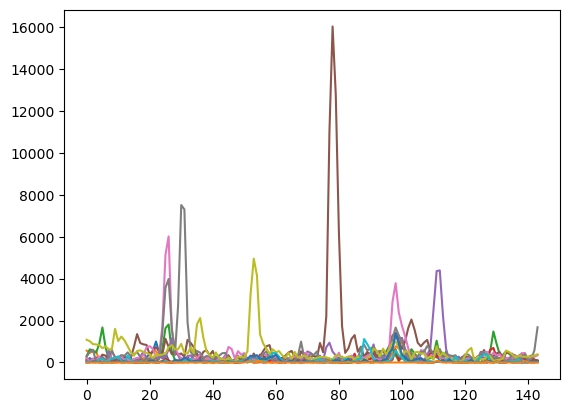

In [53]:
precursor_profile = dense_precursors[0].sum(axis=(1))
for profile in precursor_profile:
    plt.plot(profile)

plt.show()
fragment_profile = dense_fragment[0].sum(axis=(1))
for profile in fragment_profile:
    plt.plot(profile)

In [49]:
def mobility_animation(t):

    return t*0.2+0.01
    
def rt_animation(t):
    return 0.1*t+0.01

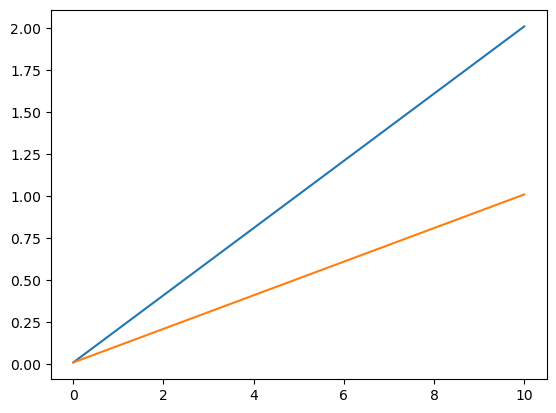

In [299]:
t = np.linspace(0, 10, 1000)
y = np.array([mobility_animation(x) for x in t])
yrt = np.array([rt_animation(x) for x in t])


plt.plot(t, y)
plt.plot(t, yrt)

2:35:43.547837  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
2:35:43.548341  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
2:35:43.548591  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.04
2:35:43.548851  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 0.08
2:35:44.496725  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
2:35:44.497138  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
2:35:44.497410  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.06
2:35:44.497625  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 0.16
2:35:46.622851  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
2:35:46.623228  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
2:35:46.623421  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.08
2:35:46.623621  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 0.25
2:35:49.964285  INFO: 

KeyboardInterrupt: 

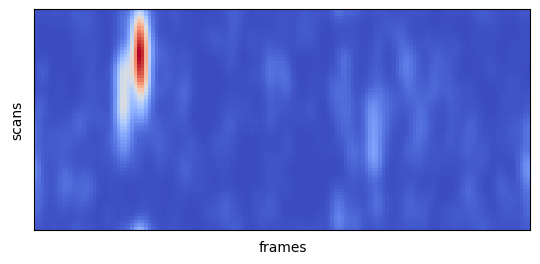

In [62]:
animation_path = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_21_kernel_movie/frames'

import os

for i, t in enumerate(np.linspace(0, 10, 180)):
    sigma_scale_rt = rt_animation(t)
    sigma_scale_mobility = mobility_animation(t)

    gaussian_filter = GaussianFilter(dia_data.jitclass(), sigma_scale_rt=sigma_scale_rt, sigma_scale_mobility=sigma_scale_mobility, peak_len_mobility=0.01)
    kernel = gaussian_filter.get_kernel()

    plt.imshow(kernel, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('scans')
    plt.xlabel('frames')

    plt.savefig(os.path.join(animation_path, f'{i:04d}_kernel.png'), dpi=280, bbox_inches='tight')

    smooth_precursors = numeric.convolve_fourier_a1(dense_precursors, kernel)
    smooth_fragments = numeric.convolve_fourier_a1(dense_fragment, kernel)

    for j in range(0,1):

        precursor_0_smooth = smooth_precursors[0,j]
        plt.imshow(precursor_0_smooth, cmap='coolwarm', interpolation='none')
        plt.ylabel('scans')
        plt.xlabel('frames')
        plt.savefig(os.path.join(animation_path, f'{i:04d}_precursor_{j}_smooth.png'), dpi=280, bbox_inches='tight')

    for j in range(4,8):

        fragment_0_smooth = smooth_fragments[0,j]
        plt.imshow(fragment_0_smooth, cmap='coolwarm', interpolation='none')
        plt.ylabel('scans')
        plt.xlabel('frames')
        plt.savefig(os.path.join(animation_path, f'{i:04d}_fragment_{j}_smooth.png'), dpi=280, bbox_inches='tight')


1:09:05.183742  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
1:09:05.185587  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1:09:05.187151  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.18
1:09:05.190691  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73
1:09:05.301688  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
1:09:05.302664  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1:09:05.303233  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.36
1:09:05.303677  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73
1:09:05.385687  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
1:09:05.387220  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1:09:05.389792  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.54
1:09:05.391273  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73
1:09:05.470751  INFO: 

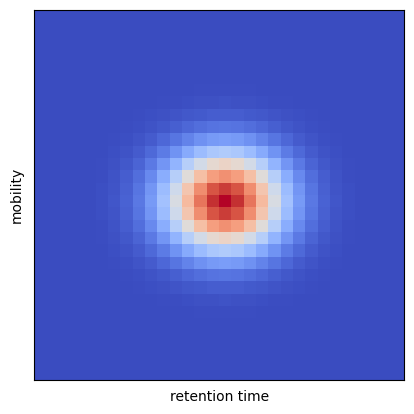

In [59]:
movie_folder = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_21_kernel_movie'
for frame, sigma_scale_rt in enumerate(np.linspace(0.05, 3, 60)):
    
    plt.imshow(kernel, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('mobility')
    plt.xlabel('retention time')

    # pad frame with 3 zeros
    plt.savefig(f'{movie_folder}/kernel_{frame:03d}.png', bbox_inches='tight', pad_inches=0)

1:03:42.239290  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
1:03:42.241009  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1:03:42.242603  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.72
1:03:42.243380  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73


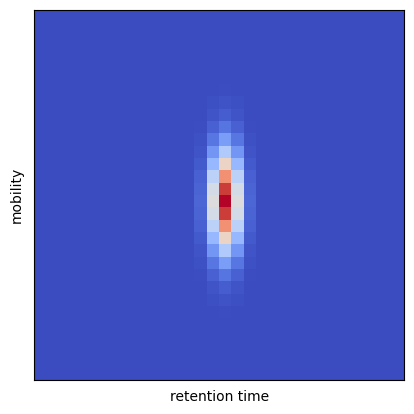

In [56]:
kernel = gaussian_filter.get_kernel()
plt.imshow(kernel, cmap='coolwarm')
plt.xticks([])
plt.yticks([])
plt.ylabel('mobility')
plt.xlabel('retention time')
plt.show()